In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from matplotlib.patches import Patch, Ellipse
from scipy.stats import linregress
from matplotlib.lines import Line2D

custom_lgd = [
    Line2D(range(1), range(1),label='Cr',marker='o', color='#404040', lw=0, markersize=12, alpha=0.75),
    Line2D(range(1), range(1),label='Ru',marker='o', color='#93648D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1), label='Co',marker='o', color='#4CC3D9', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Fe',marker='o', color='#F16745', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Mn',marker='o', color='#FFC65D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Ni',marker='o', color='#7BC8A4', lw=0, markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='v',lw=0, label="31a", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='^',lw=0, label="3a1", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='o',lw=0, label="Oct", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='P',lw=0, label="32a", markersize=12,alpha=0.75),
    #Line2D([0], [0], color='k', marker='s',lw=0, label="Penta", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='H',lw=0, label="41a", markersize=12,alpha=0.75),

    Line2D([0], [0], color='royalblue', lw=5, label="TPSSh"),
    Line2D([0], [0], color='dimgray', lw=5, label="M06-L"),
    Line2D([0], [0], color='gold', lw=5, label="B3LYP"),
    Line2D([0], [0], color='cyan', lw=5, label="BEEF-vdw"),
    
]

geom2shape = {
    "31a": "v",
    "3a1": "^",
    "oct_desorbed": "o",
    "32a": "P",
    "hexa": "v",
    "41a": "H"
}

%matplotlib inline

In [2]:
valid_convergers = pickle.load(open("well_behaved_cats.p", "rb"))

valid_names = list(set([x.split("/")[4] for x in valid_convergers]))
print(len(valid_names))
bad_catalysts = ["Ni_32a_32", "Ni_3a1_10", "Co_3a1_9_", "Fe_31a_11", "Ni_oct_desorbed_4_", "Co_31a_9_" 
                "Cr_32a_33", "Cr_32a_35", "Co_3a1_11", "Ni_31a_9_", "Co_3a1_7_", "Cr_31a_16", "Fe_3a1_11",
                "Cr_3a1_27", "Fe_31a_9_", "Mn_31a_12", "Ni_31a_11", "Ni_31a_10", "Mn_3a1_18", "Cr_3a1_16", 
                 "Mn_3a1_15", "Cr_31a_17", "Cr_32a_33", "Cr_3a1_3_", "Cr_31a_8_", "Cr_3a1_9_", "Cr_3a1_8_"]

218


In [3]:
tpssh_data =  pickle.load(open("/home/michael/PycharmProjects/gaussian_job_manage/scaling_catalyst_data.p", 'rb'))

tpssh_catnames = []
tpssh_oh_values = []
tpssh_ooh_values = []

for name in tpssh_data:
    if "pbp" in name or "penta" in name or "hexa" in name:# or name not in valid_names:
        continue
    if name in bad_catalysts:
        continue
    tpssh_catnames.append(name)
    tpssh_oh_values.append(tpssh_data[name][0])
    tpssh_ooh_values.append(tpssh_data[name][1])
    if "hexa" in name:
        print(name)
        print(tpssh_data[name][0])

b3lyp_data = pickle.load(open("/home/michael/PycharmProjects/gaussian_job_manage/catalyst_data_b3lyp.p", 'rb'))

b3lyp_catnames = []
b3lyp_oh_values = []
b3lyp_ooh_values = []

for name in b3lyp_data:
    if "pbp" in name or "penta" in name or "hexa" in name:# or name not in valid_names:
        continue
    if name in bad_catalysts:
        continue
    b3lyp_catnames.append(name)
    b3lyp_oh_values.append(b3lyp_data[name][0])
    b3lyp_ooh_values.append(b3lyp_data[name][1])
    if "hexa" in name:
        print(name)
        print(b3lyp_data[name][0])
        
m06l_data = pickle.load(open("/home/michael/PycharmProjects/gaussian_job_manage/catalyst_data_m06l.p", 'rb'))

m06l_catnames = []
m06l_oh_values = []
m06l_ooh_values = []

for name in m06l_data:
    if "pbp" in name or "penta" in name or "hexa" in name:# or name not in valid_names:
        continue
    if name in bad_catalysts:
        continue
    m06l_catnames.append(name)
    m06l_oh_values.append(m06l_data[name][0])
    m06l_ooh_values.append(m06l_data[name][1])
    if "hexa" in name:
        print(name)
        print(m06l_data[name][0])

beef_data = pickle.load(open("/home/michael/PycharmProjects/gaussian_job_manage/vasp_data.p", 'rb'))
beef_catnames = []
beef_oh_values = []
beef_ooh_values = []

for name in beef_data:
    if "pbp" in name or "penta" in name or "hexa" in name:# or name not in valid_names:
        continue
    if name in bad_catalysts:
        continue
    beef_catnames.append(name)
    beef_oh_values.append(beef_data[name][0])
    beef_ooh_values.append(beef_data[name][1])
    if "hexa" in name:
        print(name)
        print(beef_data[name][0])

LinregressResult(slope=0.8954802142404451, intercept=3.406488068557514, rvalue=0.9744132943861435, pvalue=1.246091876709359e-118, stderr=0.015395817728854464)
LinregressResult(slope=0.8976504724132358, intercept=3.5780421981641037, rvalue=0.9749592058742508, pvalue=4.434106586549291e-122, stderr=0.015094371043396528)
LinregressResult(slope=0.9306643663197911, intercept=3.413621715184386, rvalue=0.9797816013993659, pvalue=6.240650592861692e-132, stderr=0.013934434641558378)
LinregressResult(slope=0.9067205024327719, intercept=3.29179935419211, rvalue=0.9669314754817905, pvalue=3.964199323667096e-111, stderr=0.017630752575072475)


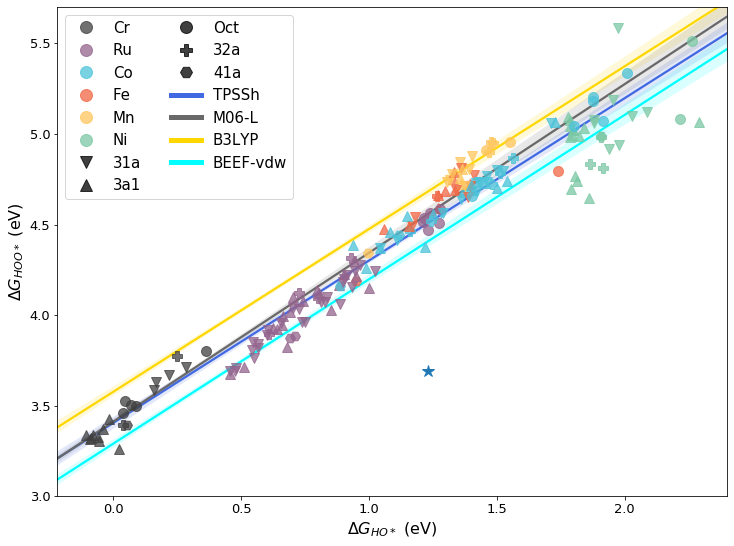

In [4]:
fig, ax = plt.subplots(figsize=(12,9))

ele2color = {
    "Fe": "#F16745",
    "Co": "#4CC3D9",
    "Mn": "#FFC65D",
    "Cr": "#404040",
    "Ru": "#93648D",
    "Ni": "#7BC8A4"
}
geom2shape = {
    "31a": "v",
    "3a1": "^",
    "oct_desorbed": "o",
    "32a": "P",
    "hexa": "s",
    "41a": "H"
}

sns.regplot(tpssh_oh_values, tpssh_ooh_values, scatter_kws={'color':'w','alpha':0}, label='TPSSh', color='royalblue')
sns.regplot(b3lyp_oh_values, b3lyp_ooh_values, scatter_kws={'color':'w', 'alpha':0}, label="B3LYP", color='gold')
sns.regplot(m06l_oh_values, m06l_ooh_values, scatter_kws={'color':'w', 'alpha':0}, label="M06-L", color='dimgray')
sns.regplot(beef_oh_values, beef_ooh_values, scatter_kws={'color':'w', 'alpha':0}, label="BEEF-vdw", color='cyan')

# known_cats = ["Ru_oct_desorbed_1_", "Ru_oct_desorbed_2_", "Ru_oct_desorbed_3_",
#             "Ru_oct_desorbed_4_", "Ru_oct_desorbed_5_", "Ru_oct_desorbed_6_", "Mn_hexa_1", "Co_hexa_4",
#             "Ru_32a_31", "Ru_32a_34", "Fe_41a_2_", "Co_41a_1_", "Co_41a_2_"]


for name, oh_val, ooh_val in zip(tpssh_catnames, tpssh_oh_values, tpssh_ooh_values):
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
    if  False:#name in known_cats:
        markeredgecolor='k'
    else:
        markeredgecolor=ele2color[name[:2]]
    
    #marker='o'
    plt.plot(oh_val, ooh_val, alpha=0.75, color=color, marker=marker, markersize=10, markeredgecolor=markeredgecolor)


plt.plot(1.23, 3.69, marker='*', markersize=13)
plt.ylim(3., 5.7)
plt.xlim(-0.22, 2.4)
plt.xlabel("$\Delta{G_{HO*}}$ (eV)", fontsize=16)
plt.ylabel("$\Delta{G_{HOO*}}$ (eV)", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(handles=custom_lgd, fontsize=15,ncol=2)
plt.savefig("all_scaling.pdf")
print(linregress(tpssh_oh_values, tpssh_ooh_values))
print(linregress(b3lyp_oh_values, b3lyp_ooh_values))
print(linregress(m06l_oh_values, m06l_ooh_values))
print(linregress(beef_oh_values, beef_ooh_values))

In [5]:
print(len(tpssh_oh_values))

182


In [6]:
for idx,val in enumerate(m06l_ooh_values):
    if val<1:
        print(m06l_catnames[idx])

In [7]:
print(len(tpssh_oh_values))

182


LinregressResult(slope=0.8954802142404451, intercept=3.406488068557514, rvalue=0.9744132943861435, pvalue=1.246091876709359e-118, stderr=0.015395817728854464)
LinregressResult(slope=0.8976504724132358, intercept=3.5780421981641037, rvalue=0.9749592058742508, pvalue=4.434106586549291e-122, stderr=0.015094371043396528)
LinregressResult(slope=0.9306643663197911, intercept=3.413621715184386, rvalue=0.9797816013993659, pvalue=6.240650592861692e-132, stderr=0.013934434641558378)
LinregressResult(slope=0.9067205024327719, intercept=3.29179935419211, rvalue=0.9669314754817905, pvalue=3.964199323667096e-111, stderr=0.017630752575072475)


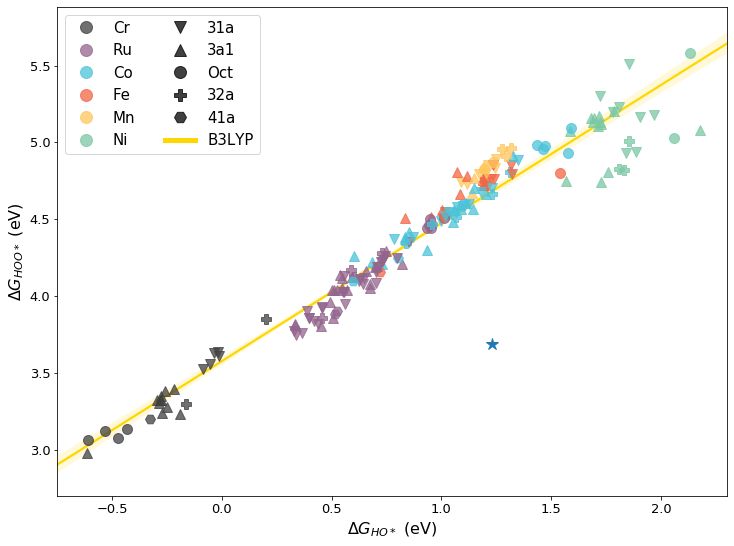

In [8]:
fig, ax = plt.subplots(figsize=(12,9))
custom_lgd = [
    Line2D(range(1), range(1),label='Cr',marker='o', color='#404040', lw=0, markersize=12, alpha=0.75),
    Line2D(range(1), range(1),label='Ru',marker='o', color='#93648D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1), label='Co',marker='o', color='#4CC3D9', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Fe',marker='o', color='#F16745', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Mn',marker='o', color='#FFC65D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Ni',marker='o', color='#7BC8A4', lw=0, markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='v',lw=0, label="31a", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='^',lw=0, label="3a1", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='o',lw=0, label="Oct", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='P',lw=0, label="32a", markersize=12,alpha=0.75),
    #Line2D([0], [0], color='k', marker='s',lw=0, label="Penta", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='H',lw=0, label="41a", markersize=12,alpha=0.75),

    Line2D([0], [0], color='gold', lw=5, label="B3LYP"),
    
]

sns.regplot(b3lyp_oh_values, b3lyp_ooh_values, scatter_kws={'color':'w', 'alpha':0}, label="B3LYP", color='gold')

for name, oh_val, ooh_val in zip(b3lyp_catnames, b3lyp_oh_values, b3lyp_ooh_values):
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
    if  False:#name in known_cats:
        markeredgecolor='k'
    else:
        markeredgecolor=ele2color[name[:2]]
    
    #marker='o'
    plt.plot(oh_val, ooh_val, alpha=0.75, color=color, marker=marker, markersize=10, markeredgecolor=markeredgecolor)

plt.plot(1.23, 3.69, marker='*', markersize=13)
#plt.ylim(3., 5.7)
plt.xlim(-0.75, 2.3)
plt.xlabel("$\Delta{G_{HO*}}$ (eV)", fontsize=16)
plt.ylabel("$\Delta{G_{HOO*}}$ (eV)", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(handles=custom_lgd, fontsize=15,ncol=2)
print(linregress(tpssh_oh_values, tpssh_ooh_values))
print(linregress(b3lyp_oh_values, b3lyp_ooh_values))
print(linregress(m06l_oh_values, m06l_ooh_values))
print(linregress(beef_oh_values, beef_ooh_values))
plt.savefig("b3lyp_scaling.pdf")


LinregressResult(slope=0.8954802142404451, intercept=3.406488068557514, rvalue=0.9744132943861435, pvalue=1.246091876709359e-118, stderr=0.015395817728854464)
LinregressResult(slope=0.8976504724132358, intercept=3.5780421981641037, rvalue=0.9749592058742508, pvalue=4.434106586549291e-122, stderr=0.015094371043396528)
LinregressResult(slope=0.9306643663197911, intercept=3.413621715184386, rvalue=0.9797816013993659, pvalue=6.240650592861692e-132, stderr=0.013934434641558378)
LinregressResult(slope=0.9067205024327719, intercept=3.29179935419211, rvalue=0.9669314754817905, pvalue=3.964199323667096e-111, stderr=0.017630752575072475)


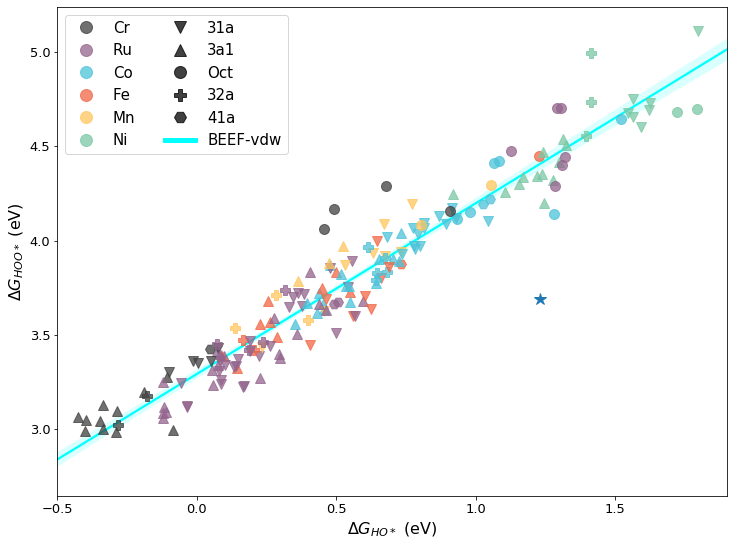

In [9]:
fig, ax = plt.subplots(figsize=(12,9))
custom_lgd = [
    Line2D(range(1), range(1),label='Cr',marker='o', color='#404040', lw=0, markersize=12, alpha=0.75),
    Line2D(range(1), range(1),label='Ru',marker='o', color='#93648D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1), label='Co',marker='o', color='#4CC3D9', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Fe',marker='o', color='#F16745', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Mn',marker='o', color='#FFC65D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Ni',marker='o', color='#7BC8A4', lw=0, markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='v',lw=0, label="31a", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='^',lw=0, label="3a1", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='o',lw=0, label="Oct", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='P',lw=0, label="32a", markersize=12,alpha=0.75),
    #Line2D([0], [0], color='k', marker='s',lw=0, label="Penta", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='H',lw=0, label="41a", markersize=12,alpha=0.75),

    Line2D([0], [0], color='cyan', lw=5, label="BEEF-vdw"),
    
]

sns.regplot(beef_oh_values, beef_ooh_values, scatter_kws={'color':'w', 'alpha':0}, label="BEEF-vdw", color='cyan')

for name, oh_val, ooh_val in zip(beef_catnames, beef_oh_values, beef_ooh_values):
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
    if  False:#name in known_cats:
        markeredgecolor='k'
    else:
        markeredgecolor=ele2color[name[:2]]
    
    #marker='o'
    plt.plot(oh_val, ooh_val, alpha=0.75, color=color, marker=marker, markersize=10, markeredgecolor=markeredgecolor)

plt.plot(1.23, 3.69, marker='*', markersize=13)
#plt.ylim(3., 5.7)
plt.xlim(-0.5, 1.9)
plt.xlabel("$\Delta{G_{HO*}}$ (eV)", fontsize=16)
plt.ylabel("$\Delta{G_{HOO*}}$ (eV)", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(handles=custom_lgd, fontsize=15,ncol=2)
print(linregress(tpssh_oh_values, tpssh_ooh_values))
print(linregress(b3lyp_oh_values, b3lyp_ooh_values))
print(linregress(m06l_oh_values, m06l_ooh_values))
print(linregress(beef_oh_values, beef_ooh_values))
plt.savefig("beef_scaling.pdf")


LinregressResult(slope=0.8954802142404451, intercept=3.406488068557514, rvalue=0.9744132943861435, pvalue=1.246091876709359e-118, stderr=0.015395817728854464)
LinregressResult(slope=0.8976504724132358, intercept=3.5780421981641037, rvalue=0.9749592058742508, pvalue=4.434106586549291e-122, stderr=0.015094371043396528)
LinregressResult(slope=0.9306643663197911, intercept=3.413621715184386, rvalue=0.9797816013993659, pvalue=6.240650592861692e-132, stderr=0.013934434641558378)
LinregressResult(slope=0.9067205024327719, intercept=3.29179935419211, rvalue=0.9669314754817905, pvalue=3.964199323667096e-111, stderr=0.017630752575072475)


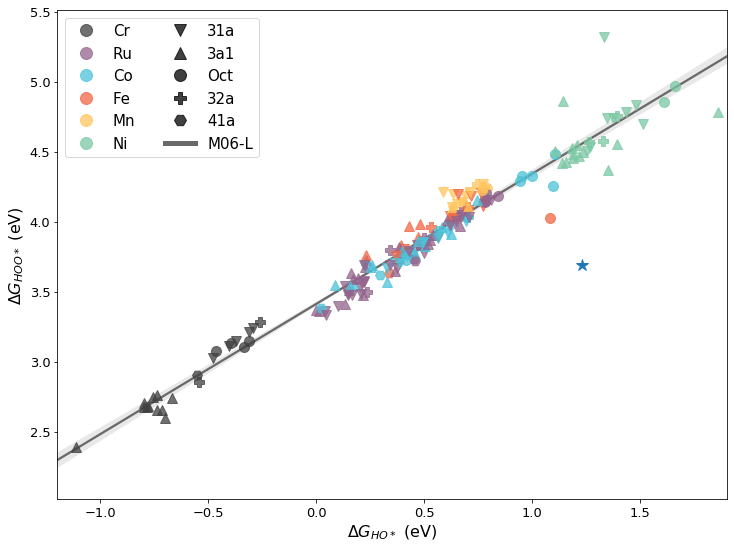

In [10]:
fig, ax = plt.subplots(figsize=(12,9))
custom_lgd = [
    Line2D(range(1), range(1),label='Cr',marker='o', color='#404040', lw=0, markersize=12, alpha=0.75),
    Line2D(range(1), range(1),label='Ru',marker='o', color='#93648D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1), label='Co',marker='o', color='#4CC3D9', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Fe',marker='o', color='#F16745', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Mn',marker='o', color='#FFC65D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Ni',marker='o', color='#7BC8A4', lw=0, markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='v',lw=0, label="31a", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='^',lw=0, label="3a1", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='o',lw=0, label="Oct", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='P',lw=0, label="32a", markersize=12,alpha=0.75),
    #Line2D([0], [0], color='k', marker='s',lw=0, label="Penta", markersize=12,alpha=0.75),
    Line2D([0], [0], color='k', marker='H',lw=0, label="41a", markersize=12,alpha=0.75),

    Line2D([0], [0], color='dimgray', lw=5, label="M06-L"),
    
]

sns.regplot(m06l_oh_values, m06l_ooh_values, scatter_kws={'color':'w', 'alpha':0}, label="M06-L", color='dimgray')

for name, oh_val, ooh_val in zip(m06l_catnames, m06l_oh_values, m06l_ooh_values):
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
    if  False:#name in known_cats:
        markeredgecolor='k'
    else:
        markeredgecolor=ele2color[name[:2]]
    
    #marker='o'
    plt.plot(oh_val, ooh_val, alpha=0.75, color=color, marker=marker, markersize=10, markeredgecolor=markeredgecolor)

plt.plot(1.23, 3.69, marker='*', markersize=13)
#plt.ylim(3., 5.7)
plt.xlim(-1.2, 1.9)
plt.xlabel("$\Delta{G_{HO*}}$ (eV)", fontsize=16)
plt.ylabel("$\Delta{G_{HOO*}}$ (eV)", fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.legend(handles=custom_lgd, fontsize=15,ncol=2)
print(linregress(tpssh_oh_values, tpssh_ooh_values))
print(linregress(b3lyp_oh_values, b3lyp_ooh_values))
print(linregress(m06l_oh_values, m06l_ooh_values))
print(linregress(beef_oh_values, beef_ooh_values))
plt.savefig("m06l_scaling.pdf")
